In this project, you will analyze the selling price of a car. You will have to study the data, identify properties, correlations and/or anomalies and then build a model to predict the value of a car.

In attachment you can find a dataset where each observation is a transaction for buying a car. Here, you can find a description of the variables:

·         Price : the selling price                 

·         MatriculationMonth : the matriculation month of the car

·         MatriculationYear :  the matriculation year of the car

·         Km: total number of travelled km       

·         cv : power of a car                   

·         FuelType : fuel type diesel/gasoline/methan/gpl/hybrid ecc..  (the values are in Italian)

·         gearboxType: gearboxType if Automatic or Manual (the values are in Italian)

·         Consume: average Fuel consumption   

·         city             

·         province              

·         Brand                 

·         Model                  

·         Preparation      

·         Engine: engine capacity             

·         Seats: number of seats             

·         ConsumeFuel : Fuel consumption in urban area

·         ConsumeFuelNotUrban : fuel consumption in non urban area

·         Emissions: co2 emissions         

·         Color                  

·         Metallizzato : If it is a special kind of color or not          

·         Airbag : type of airbag           

·         NumberDoors : Number of doors         

·         EmissionClass  : Emission Class        

·         AirConditioning : type of air conditioning system   

·         Interior: Color of interior   

You can decide, based on some rule or motivation, to use all the feature or only a subset of them.


In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('auto_price.csv')

In [10]:
# Pandas describe() is used to view some basic statistical details of a data frame or a series of numeric values.
data.describe()

,price,MatriculationYear,km,cv,Engine,Seats,ConsumeFuel,ConsumeFuelNotUrban,Emissions
count,1.782480e+05,178248.000000,1.467560e+05,166933.000000,169898.000000,162098.000000,123753.000000,124041.00000,122810.000000
mean,2.026217e+04,2012.967422,8.562274e+04,98.768560,1709.334771,6.170237,5.371873,4.66967,130.222492
std,2.594073e+04,7.237225,5.605965e+06,92.949295,764.426381,403.931146,24.231545,22.95463,38.575779
min,2.390000e+02,1900.000000,1.000000e+00,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000
25%,9.400000e+03,2011.000000,1.500000e+04,70.000000,1368.000000,5.000000,4.100000,3.80000,108.000000
50%,1.590000e+04,2015.000000,5.700000e+04,85.000000,1598.000000,5.000000,4.900000,4.20000,119.000000
75%,2.450000e+04,2017.000000,1.118250e+05,110.000000,1995.000000,5.000000,5.800000,5.00000,143.000000
max,3.500000e+06,2018.000000,2.147484e+09,13950.000000,96400.000000,115000.000000,6000.000000,7000.00000,1125.000000


In [11]:
# Pandas info() function is used to get a concise summary of the dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178248 entries, 0 to 178247
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                178248 non-null  int64  
 1   MatriculationMonth   178248 non-null  object 
 2   MatriculationYear    178248 non-null  int64  
 3   km                   146756 non-null  float64
 4   cv                   166933 non-null  float64
 5   FuelType             177485 non-null  object 
 6   gearboxType          177121 non-null  object 
 7   Consume              131811 non-null  object 
 8   city                 178172 non-null  object 
 9   province             178172 non-null  object 
 10  Brand                178087 non-null  object 
 11  Model                178087 non-null  object 
 12  Preparation          178087 non-null  object 
 13  Engine               169898 non-null  float64
 14  Seats                162098 non-null  float64
 15  ConsumeFuel      

In [7]:
'''
one_hot_airbag = pd.get_dummies(data['Airbag'])
data = data.drop('Airbag', axis=1)
data = data.join(one_hot_airbag)

one_hot_fueltype = pd.get_dummies(data['FuelType'])
data = data.drop('FuelType', axis=1)
data = data.join(one_hot_fueltype)

one_hot_air = pd.get_dummies(data['AirConditioning'])
data = data.drop('AirConditioning', axis=1)
data = data.join(one_hot_air)

data['gearboxType'].fillna(data['gearboxType'].mode()[0], inplace=True)
one_hot_gearbox = pd.get_dummies(data['gearboxType'])
data = data.drop('gearboxType', axis=1)
data = data.join(one_hot_gearbox)

data['NumberDoors'].fillna(data['NumberDoors'].mode()[0], inplace=True)
one_hot_doors = pd.get_dummies(data['NumberDoors'])
data = data.drop('NumberDoors', axis=1)
data = data.join(one_hot_doors)

'''

"\none_hot_airbag = pd.get_dummies(data['Airbag'])\ndata = data.drop('Airbag', axis=1)\ndata = data.join(one_hot_airbag)\n\none_hot_fueltype = pd.get_dummies(data['FuelType'])\ndata = data.drop('FuelType', axis=1)\ndata = data.join(one_hot_fueltype)\n\none_hot_air = pd.get_dummies(data['AirConditioning'])\ndata = data.drop('AirConditioning', axis=1)\ndata = data.join(one_hot_air)\n\ndata['gearboxType'].fillna(data['gearboxType'].mode()[0], inplace=True)\none_hot_gearbox = pd.get_dummies(data['gearboxType'])\ndata = data.drop('gearboxType', axis=1)\ndata = data.join(one_hot_gearbox)\n\ndata['NumberDoors'].fillna(data['NumberDoors'].mode()[0], inplace=True)\none_hot_doors = pd.get_dummies(data['NumberDoors'])\ndata = data.drop('NumberDoors', axis=1)\ndata = data.join(one_hot_doors)\n\n"

In [14]:
data.dropna(subset=['Model'], inplace=True)
size_mapping = {'Euro 0': 0,'Euro 1': 1,'Euro 2': 2,'Euro 3': 3,'Euro 4': 4,'Euro 5': 5,'Euro 6': 6}
data['EmissionClass'] = data['EmissionClass'].map(size_mapping)
data['Consume'] = data['Consume'].str.extract(r"(\d+\.?\d*)",).astype(float)
data['Metallizzato'].fillna(value='No', inplace=True)
size_mapping = {'Sì': 1,'No': 0}
data['Metallizzato'] = data['Metallizzato'].map(size_mapping)

In [1085]:
'''
# calcoliamo la frequenza di ogni valore nella colonna 'paese'
freq = data['Model'].value_counts(normalize=True)

# creiamo una nuova colonna contenente le frequenze
data['Model'] = data['Model'].map(freq)

# calcoliamo la frequenza di ogni valore nella colonna 'paese'
freq = data['Brand'].value_counts(normalize=True)

# creiamo una nuova colonna contenente le frequenze
data['Brand'] = data['Brand'].map(freq)

# calcoliamo la frequenza di ogni valore nella colonna 'paese'
freq = data['Preparation'].value_counts(normalize=True)

# creiamo una nuova colonna contenente le frequenze
data['Preparation'] = data['Preparation'].map(freq)

data['EmissionClass'] = data['EmissionClass'].fillna(data['EmissionClass'].mean())
data["EmissionClass"] = round(data["EmissionClass"])
data['Emissions'] = data['Emissions'].fillna(data['Emissions'].mean()) 
data['ConsumeFuelNotUrban'] = data['ConsumeFuelNotUrban'].fillna(data['ConsumeFuelNotUrban'].mean()) 
data['Engine'] = data['Engine'].fillna(data['Engine'].mean()) 
data['ConsumeFuel'] = data['ConsumeFuel'].fillna(data['ConsumeFuel'].mean()) 

'''

In [1089]:
'''
data.dropna(subset=['cv'], inplace=True)
data = data.drop('Interior', axis=1)
data = data.drop('Color', axis=1)
data = data.drop('Consume', axis=1)
data = data.drop('Seats', axis=1)
data = data.drop('city', axis=1)
data = data.drop('Metallizzato', axis=1)
data = data.drop('province', axis=1)
data = data.drop('MatriculationMonth', axis=1)
'''

In [15]:
# The isnull() method is used to check and manage NULL values in a data frame.
data.isnull().sum()

price                      0
MatriculationMonth         0
MatriculationYear          0
km                     31488
cv                     11278
FuelType                 756
gearboxType             1123
Consume                46288
city                      76
province                  76
Brand                      0
Model                      0
Preparation                0
Engine                  8316
Seats                  16089
ConsumeFuel            54334
ConsumeFuelNotUrban    54046
Emissions              55291
Color                  15712
Metallizzato               0
Airbag                 36497
NumberDoors            24554
EmissionClass          58261
AirConditioning        17952
Interior               98319
dtype: int64

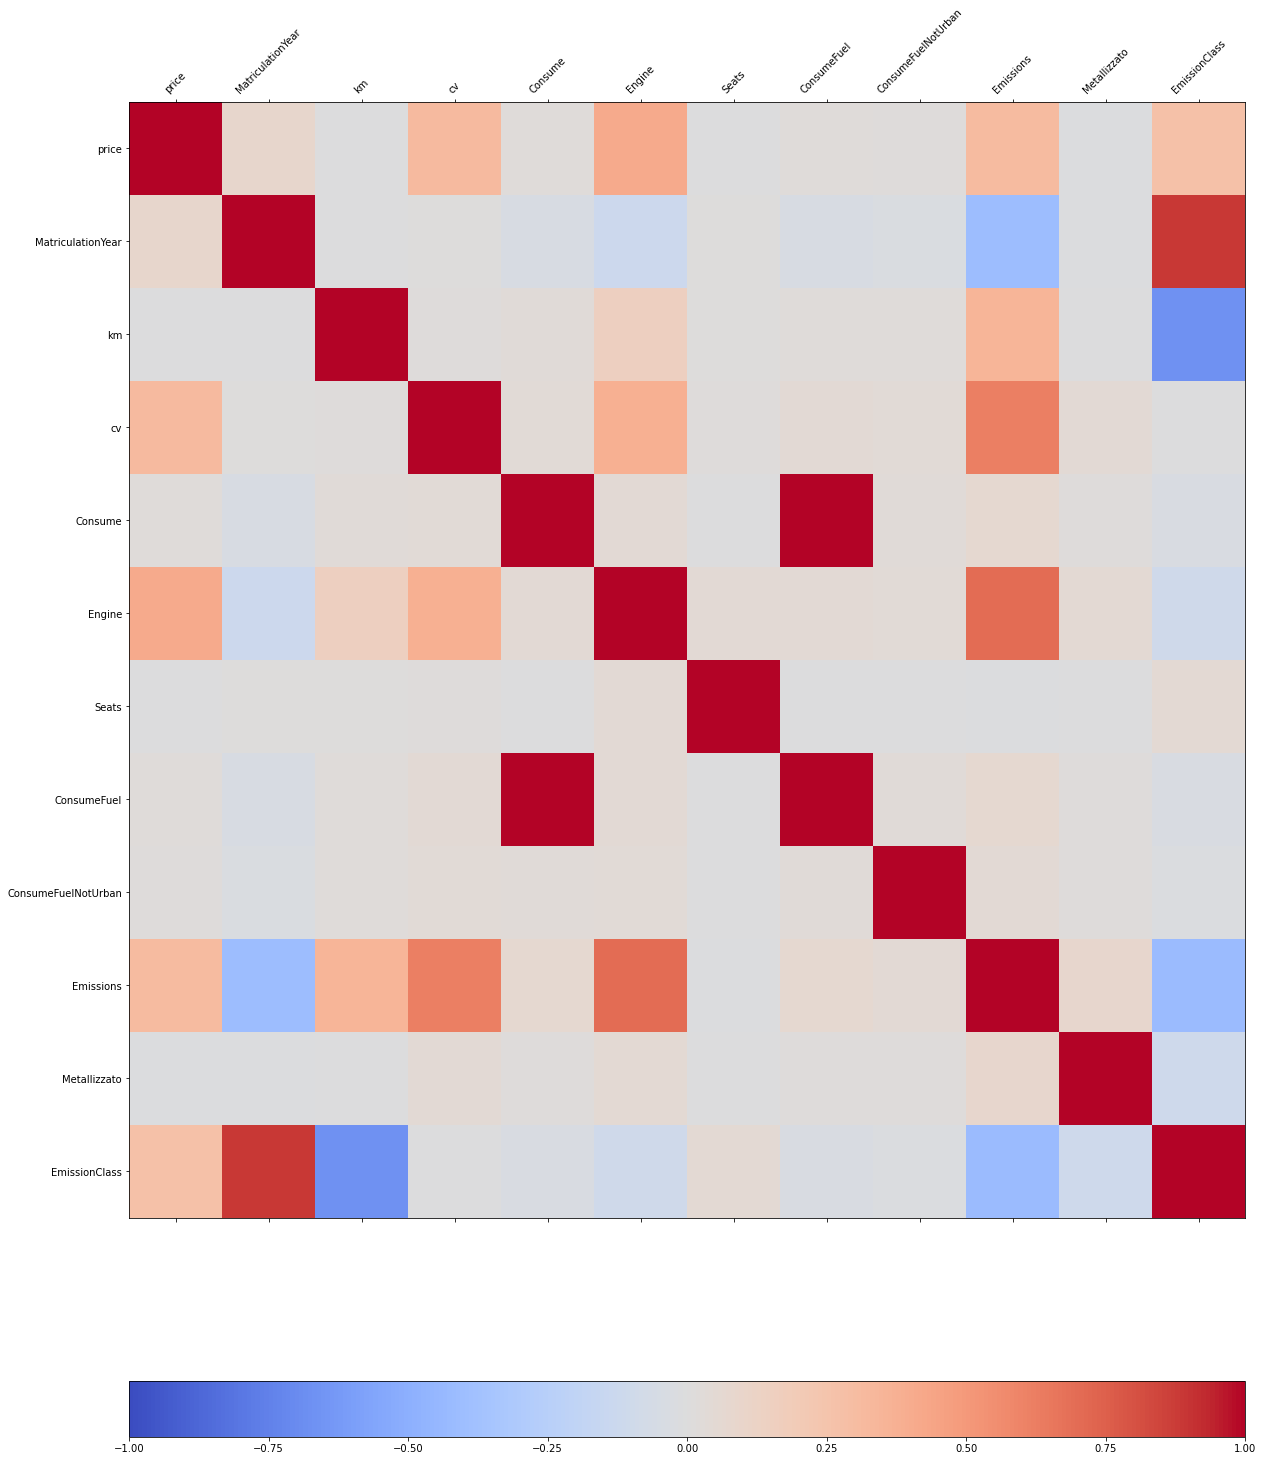

In [16]:
from matplotlib import pyplot as plt
corr = data.corr()


fig, ax =plt.subplots(figsize=(20,30))

plot = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(plot,orientation="horizontal",  pad=0.1)
plt.xticks(range(len(corr.columns)),corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)),corr.columns)

plt.show()

In [17]:
corr

,price,MatriculationYear,km,cv,Consume,Engine,Seats,ConsumeFuel,ConsumeFuelNotUrban,Emissions,Metallizzato,EmissionClass
price,1.000000,0.092747,-0.004170,0.318011,0.019462,0.408485,-0.000615,0.019257,0.015277,0.311902,-0.009048,0.273362
MatriculationYear,0.092747,1.000000,-0.003192,0.000608,-0.042091,-0.118169,0.000754,-0.041619,-0.026773,-0.405134,-0.012919,0.888599
km,-0.004170,-0.003192,1.000000,0.015115,0.023732,0.154272,0.002508,0.022960,0.016859,0.350372,-0.001379,-0.665101
cv,0.318011,0.000608,0.015115,1.000000,0.037999,0.379724,0.009404,0.042647,0.031644,0.623546,0.045197,-0.001028
Consume,0.019462,-0.042091,0.023732,0.037999,1.000000,0.043619,-0.004531,1.000000,0.026088,0.063704,0.010059,-0.036790
Engine,0.408485,-0.118169,0.154272,0.379724,0.043619,1.000000,0.043071,0.043133,0.032220,0.702105,0.047273,-0.094895
Seats,-0.000615,0.000754,0.002508,0.009404,-0.004531,0.043071,1.000000,-0.004495,-0.002031,-0.013332,-0.003072,0.046938
ConsumeFuel,0.019257,-0.041619,0.022960,0.042647,1.000000,0.043133,-0.004495,1.000000,0.026081,0.063429,0.009623,-0.036816
ConsumeFuelNotUrban,0.015277,-0.026773,0.016859,0.031644,0.026088,0.032220,-0.002031,0.026081,1.000000,0.046497,0.008063,-0.022202
Emissions,0.311902,-0.405134,0.350372,0.623546,0.063704,0.702105,-0.013332,0.063429,0.046497,1.000000,0.084820,-0.414082


In [19]:
label = data['price']

data = data.drop('price', axis=1)

In [1101]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=101)

In [1071]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
y_pred = lr.predict(X_test)

MSE: 0.6268850027108662
Migliori parametri: {'fit_intercept': False, 'normalize': True}


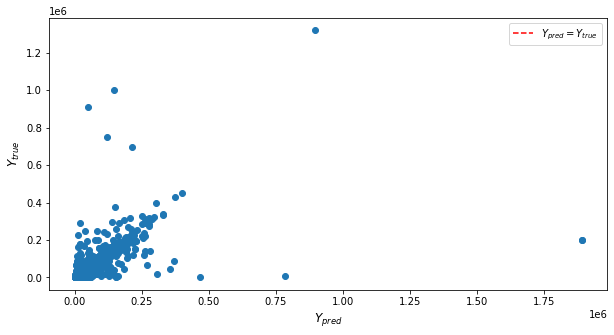

mean_absolute_error: 3542.861919260535
mean_squared_error: 313372130.29937506
mean_absolute_percentage_error: 0.1849451735842429


In [1104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

fig , ax = plt.subplots(1,1,figsize=(10,5))
ax.scatter(y_pred, y_test)
ax.plot([-2,5],[-2,5], "--", c='red', label = "$Y_{pred} = Y_{true}$")
ax.set_xlabel("$Y_{pred}$", fontsize = 12)
ax.set_ylabel("$Y_{true}$", fontsize = 12)
plt.legend()
plt.show()
print("mean_absolute_error:", mean_absolute_error(y_pred, y_test))
print("mean_squared_error:", mean_squared_error(y_pred, y_test))
print("mean_absolute_percentage_error:", mean_absolute_percentage_error(y_pred, y_test))